# Music Generation

In this project, we will explore generating symbolic music using hidden markov models.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from utils import *
from hmm import HMM

import IPython.display as ipd

## Data exploration

In [6]:
data = load_jsb_chorales()

Text(0, 0.5, 'Count')

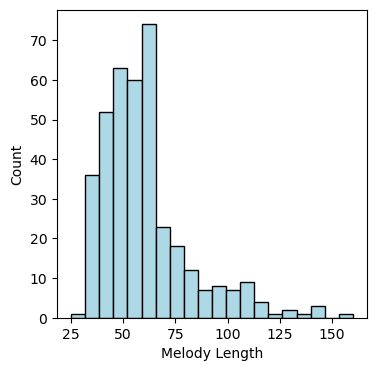

In [7]:
lengths = [len(song) for song in data]

fig, ax = plt.subplots(figsize=(4,4))
ax.hist(lengths, bins=20, color='lightblue', edgecolor='black')
ax.set_xlabel('Melody Length')
ax.set_ylabel('Count')

## HMM

In [25]:
x_train = data[:300]

seq_train = np.array([note for song in x_train for note in song])
lengths = np.array([len(song) for song in x_train])

In [26]:
model = HMM(n_hidden=2, n_obs=np.max(seq_train)+1)
model.fit(seq_train, lengths, n_iter=10)

In [27]:
x_sample, state_sequence = model.sample(50)

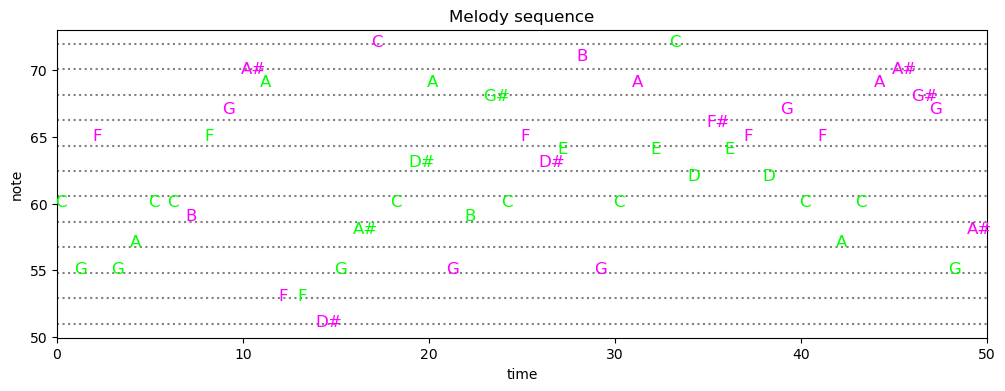

In [28]:
plot_sequence(x_sample, state_sequence)

In [32]:
write_wav(x_sample, "out/test.wav")

ipd.Audio("out/test.wav")

## Reference

In [17]:
seq_train = data[:300]
lengths = np.array([len(song) for song in seq_train])

x_train = np.concatenate([melody[:length] for length, melody in zip(lengths, seq_train)]).reshape(-1, 1)

In [18]:
from hmmlearn.hmm import CategoricalHMM

In [19]:
model = CategoricalHMM(n_components=2, n_iter=100)
model.fit(x_train, lengths)

CategoricalHMM(n_components=2, n_features=94, n_iter=100,
               random_state=RandomState(MT19937) at 0x7DC400B94640)

In [20]:
x_sample, state_sequence = model.sample(n_samples=50)

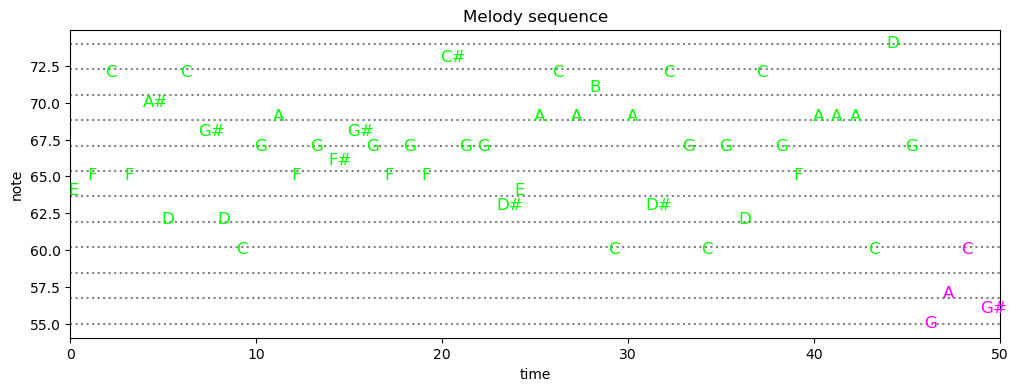

In [21]:
plot_sequence(x_sample[:,0], state_sequence)

In [22]:
write_midi_file(x_sample[:,0], "out/test.mid")

In [23]:
!timidity "out/test.mid"

Playing out/test.mid
MIDI file: out/test.mid
Format: 1  Tracks: 2  Divisions: 960
Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0
